In [1]:
import numpy as np
from matplotlib. image import imread
import matplotlib. pyplot as plt


In [84]:
def get_bw(path):
    image_raw = imread(path)
    image_sum = image_raw.sum(axis=2)
    image_bw = image_sum/image_sum.max()
    return image_bw

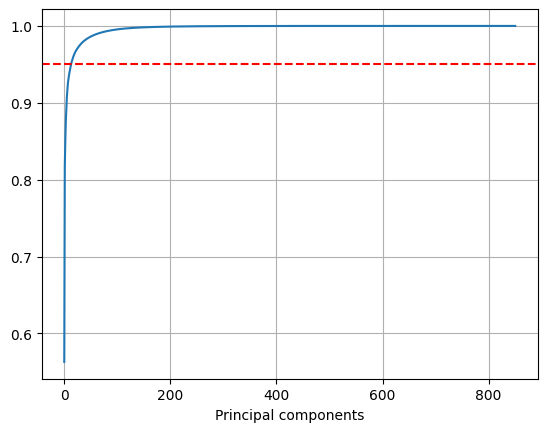

In [85]:
image_bw = get_bw('hedgehog.jpg')
original_shape = image_bw.shape
centered_matrix = (image_bw - np.mean(image_bw))
centered_matrix = centered_matrix.reshape(original_shape)
covariance_matrix = np.cov(centered_matrix, rowvar=False)

eigenvalues, eigenvectors = np.linalg.eigh(covariance_matrix)
sorted_indices = np.argsort(eigenvalues)[::-1]
sorted_eigenvalues = eigenvalues[sorted_indices]
sorted_eigenvectors = eigenvectors[:, sorted_indices]

cumulative_variance = np.cumsum(sorted_eigenvalues) / np.sum(sorted_eigenvalues)
plt.plot(cumulative_variance)
plt.axhline(y=0.95, color='r', linestyle='--')
plt.xlabel('Principal components')
plt.grid()

L = np.argmax(cumulative_variance >= 0.5) + 1
selected_eigenvectors = sorted_eigenvectors[:, :L]

pca_transformed = np.dot(centered_matrix, selected_eigenvectors)

reconstructed_matrix = np.dot(pca_transformed, selected_eigenvectors.T) + np.mean(image_bw)
reconstructed_image = reconstructed_matrix.reshape(image_bw.shape)

# plt.imshow(reconstructed_image, cmap='gray')

In [86]:
def reduced_image(components_num, path):
    image_bw = get_bw(path)
    original_shape = image_bw.shape
    centered_matrix = (image_bw - np.mean(image_bw))
    centered_matrix = centered_matrix.reshape(original_shape)
    covariance_matrix = np.cov(centered_matrix, rowvar=False)
    
    eigenvalues, eigenvectors = np.linalg.eigh(covariance_matrix)
    sorted_indices = np.argsort(eigenvalues)[::-1]
    sorted_eigenvalues = eigenvalues[sorted_indices]
    sorted_eigenvectors = eigenvectors[:, sorted_indices]
    
    cumulative_variance = np.cumsum(sorted_eigenvalues) / np.sum(sorted_eigenvalues)
    selected_eigenvectors = sorted_eigenvectors[:, :components_num]
    
    pca_transformed = np.dot(centered_matrix, selected_eigenvectors)
    
    reconstructed_matrix = np.dot(pca_transformed, selected_eigenvectors.T) + np.mean(image_bw)
    return  reconstructed_matrix.reshape(image_bw.shape)

<Figure size 1000x1000 with 0 Axes>

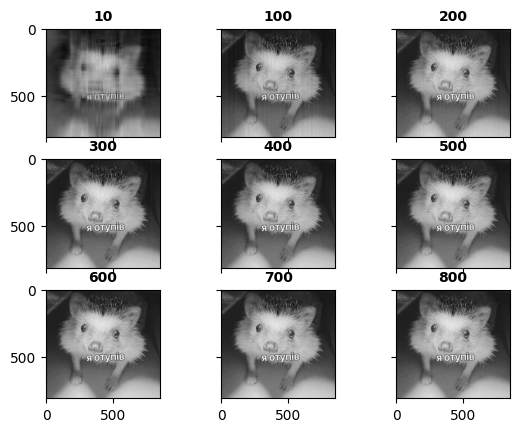

In [87]:
mosaic = [['A', 'B', 'C'], ['D', 'E', 'F'], ['G','H', 'I']]
positions = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I']
plt.figure(figsize=(10, 10), dpi=100)
fig, axd = plt.subplot_mosaic(mosaic, sharex=True, sharey=True)
components_nums = [10, 100, 200, 300, 400, 500, 600, 700, 800]
for pos,component in zip(positions, components_nums):
    image = reduced_image(component, f'hedgehog.jpg')
    axd[pos].imshow(image, cmap='gray')
    axd[pos].set_title(component, fontsize=10, fontweight='bold')
    
plt.show()
